In [32]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix
)
import xgboost as xgb
import pickle
import shap
import time
import psutil

# Para realizar cross validation
# -----------------------------------------------------------------------
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import KBinsDiscretizer

import warnings  
warnings.filterwarnings("ignore") 

In [36]:
import sys
sys.path.append("../")

from src.support_models import ClassificationModels, rows_colors_model

ImportError: cannot import name 'rows_colors_model' from 'src.support_models' (/Users/javi/Documents/Hackio/Proyectos/Proyecto-8-Prediccion-de-Retencion-de-Empleados/notebook/../src/support_models.py)

In [21]:
df = pd.read_csv('../data/output/complete_data_preprocessed.csv', index_col=0)

In [22]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Gender_Female,Gender_Male
0,0.785714,0.0,0.411411,0.000000,0.178571,0.25,0.180855,0.00,0.272843,0.154771,...,0.025,1.000000,0.025,0.000000,0.666667,1.000000,0.333333,0.666667,1.0,0.0
1,0.309524,1.0,1.000000,0.045611,0.321429,0.00,0.180855,0.00,0.559647,1.000000,...,0.150,0.500000,0.125,0.066667,0.666667,0.333333,1.000000,0.333333,1.0,0.0
2,0.333333,0.0,1.000000,0.045611,0.571429,0.75,0.028357,0.75,0.459020,0.154771,...,0.125,0.333333,0.125,0.000000,0.333333,0.333333,0.000000,0.666667,0.0,1.0
3,0.476190,0.0,0.000000,0.045611,0.035714,1.00,0.180855,0.50,0.190874,0.154771,...,0.325,0.833333,0.200,0.466667,1.000000,1.000000,0.666667,0.333333,0.0,1.0
4,0.333333,0.0,0.411411,0.045611,0.321429,0.00,0.163705,0.00,0.459020,1.000000,...,0.225,0.333333,0.150,0.000000,1.000000,0.000000,0.666667,0.666667,0.0,1.0


### Logistic regression

In [23]:
models = ClassificationModels(df, "Attrition")

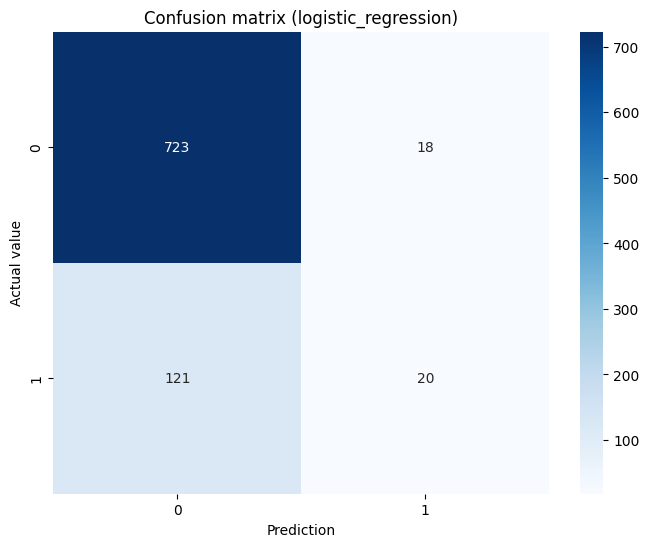

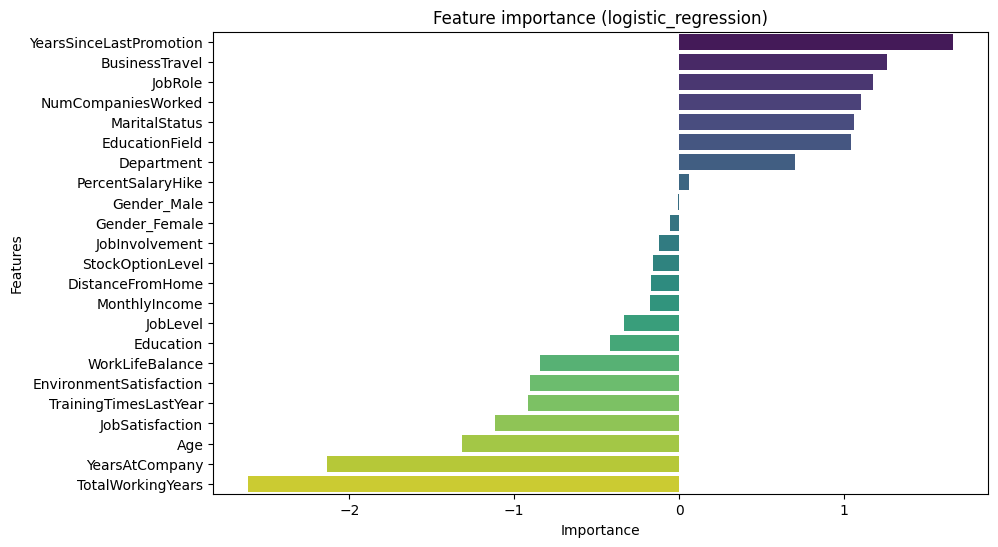

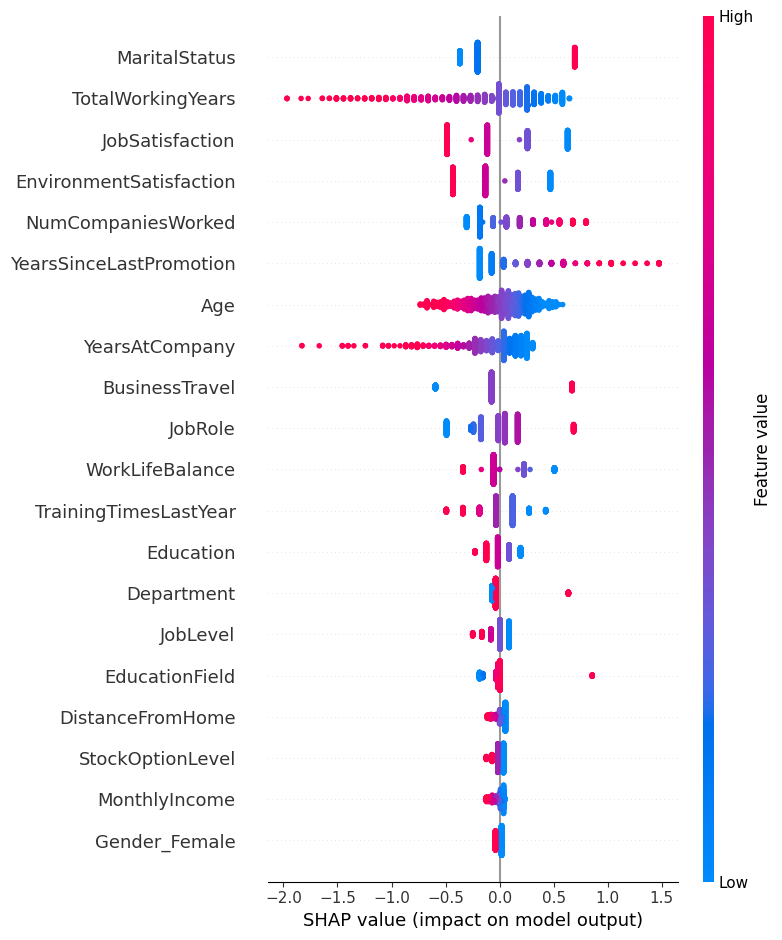

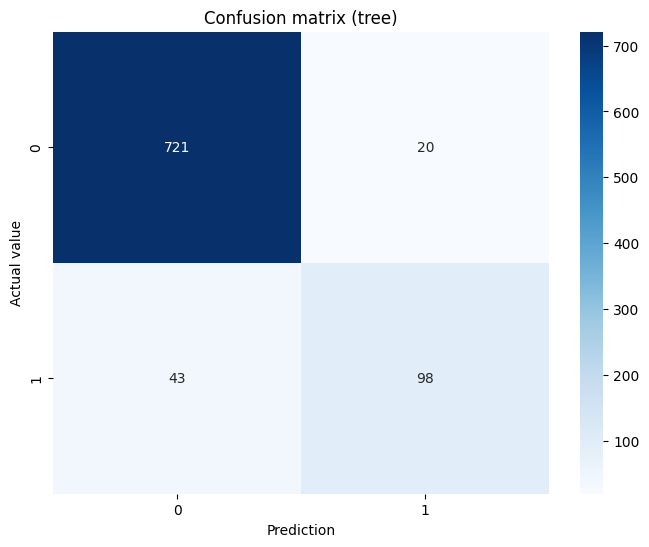

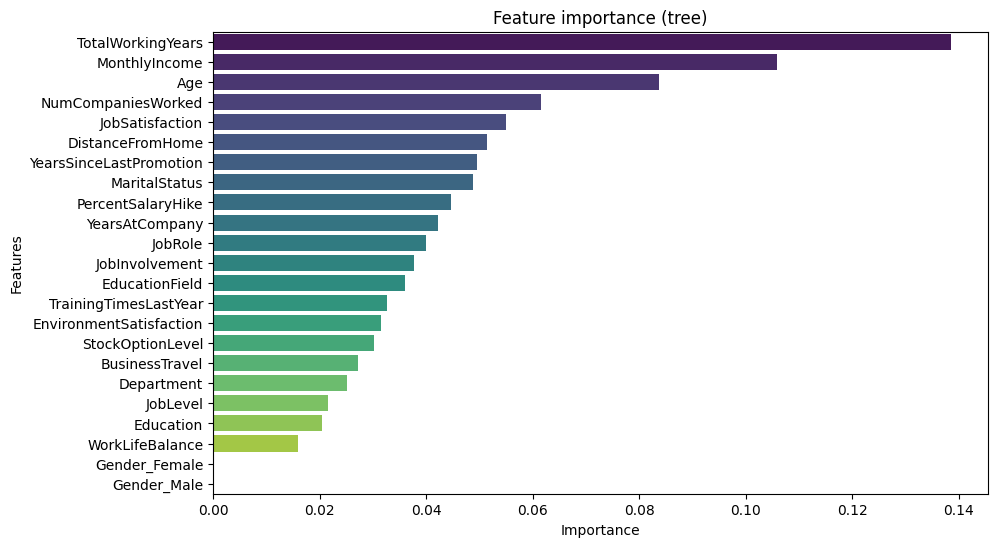

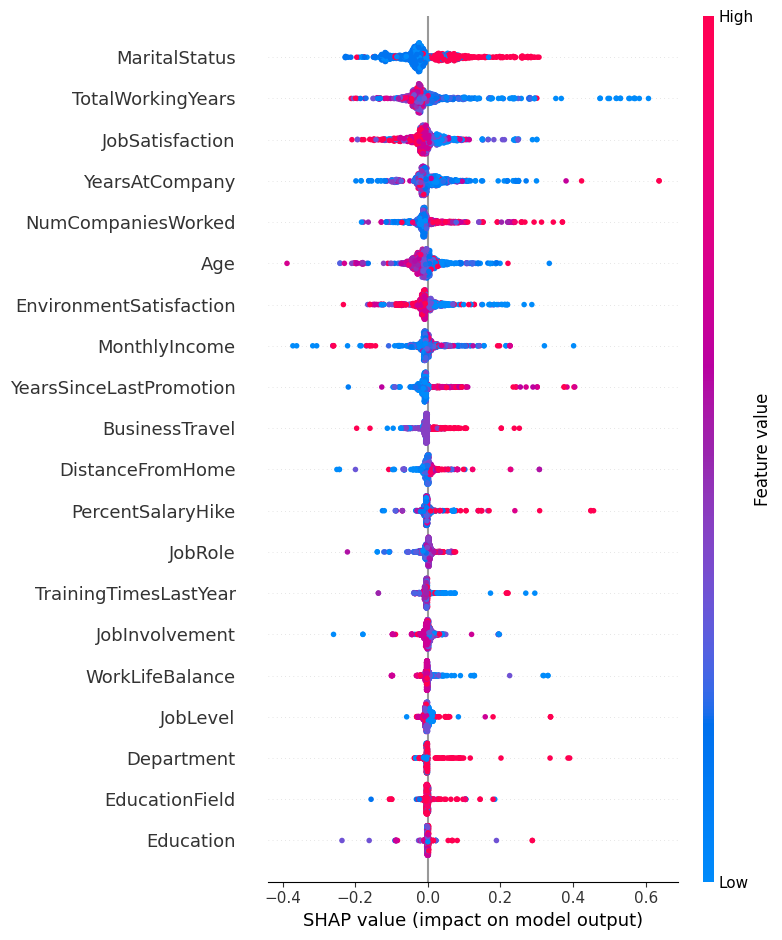

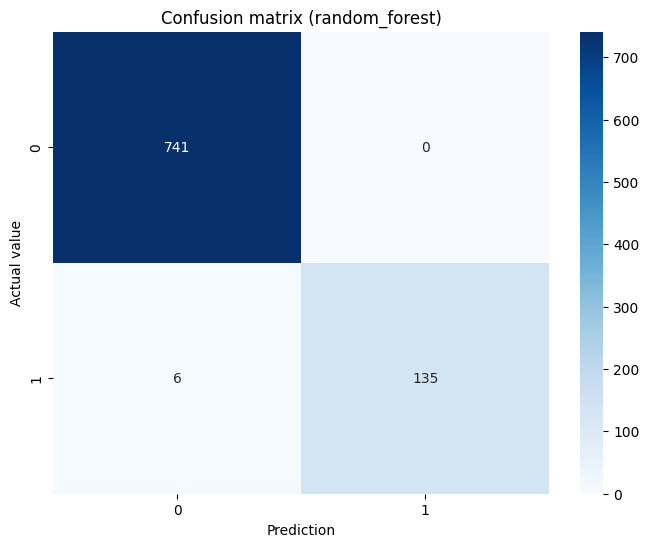

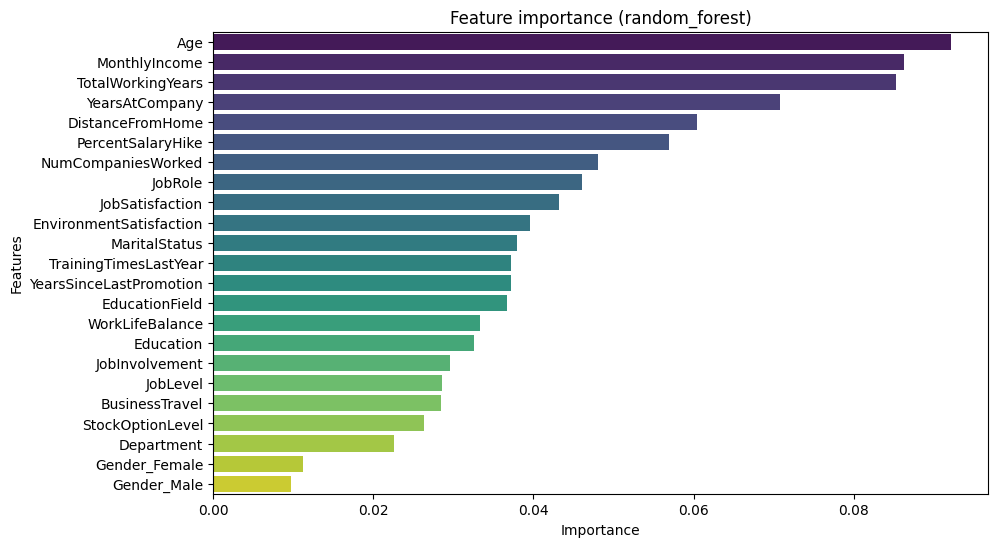

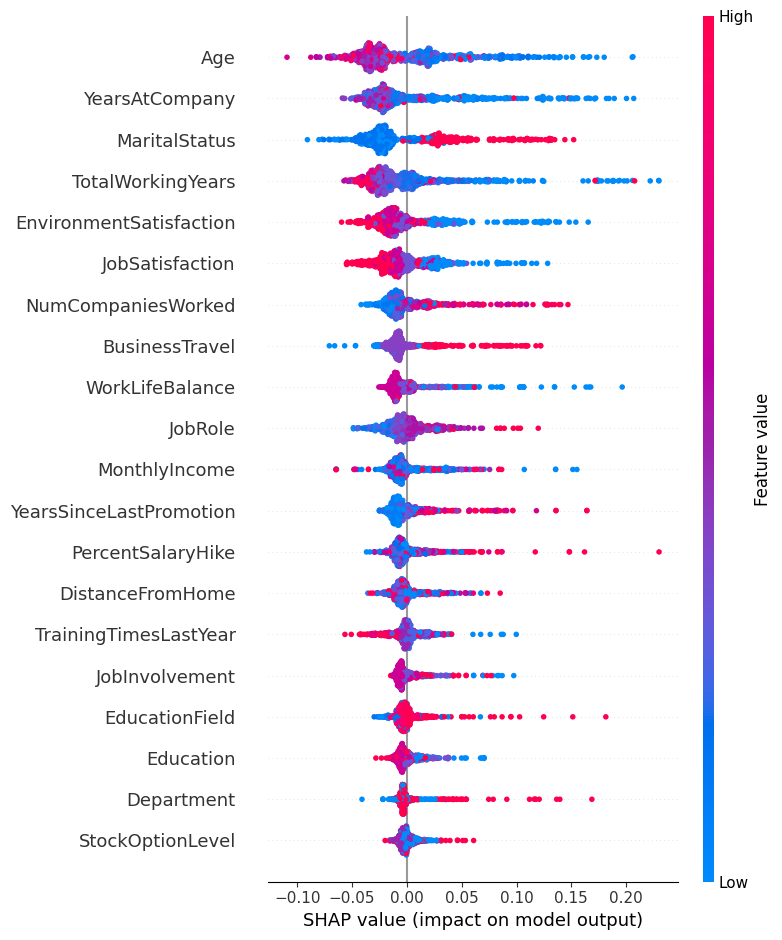

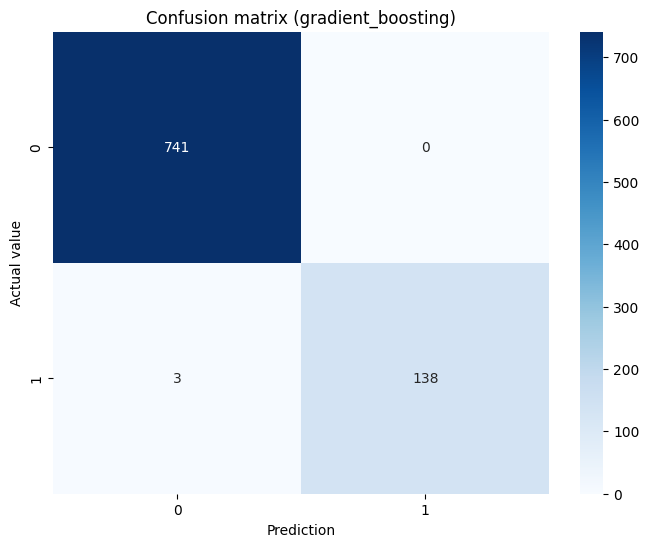

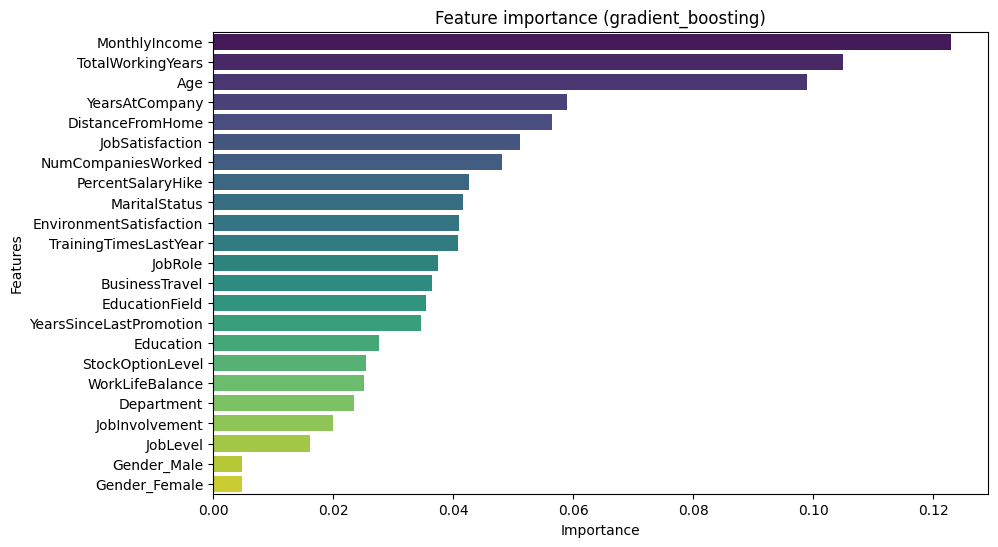

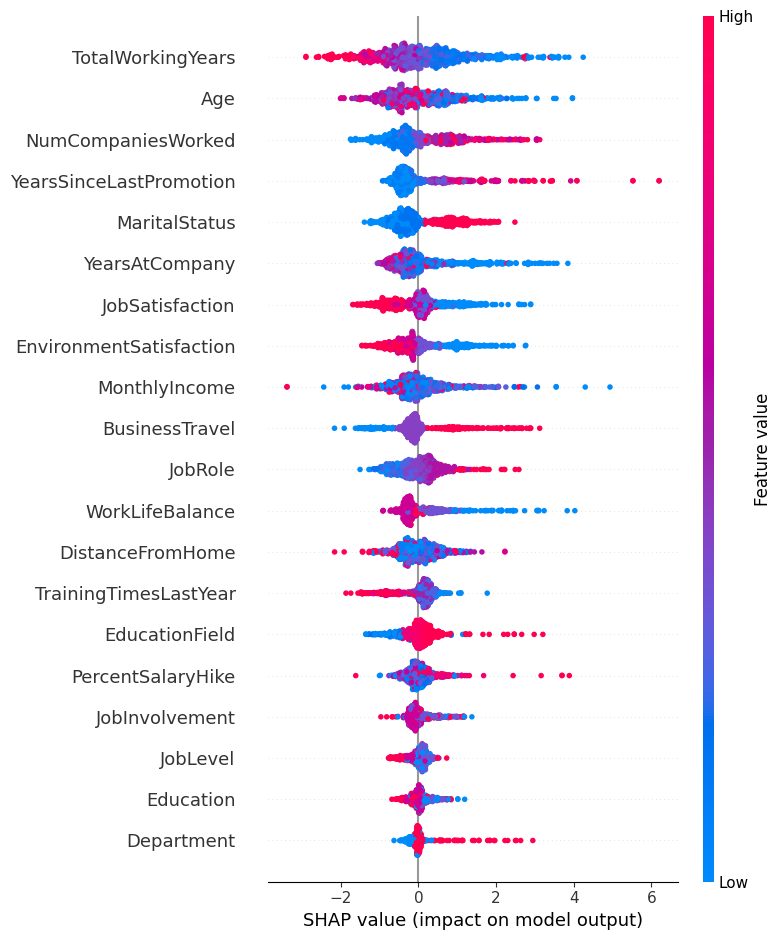

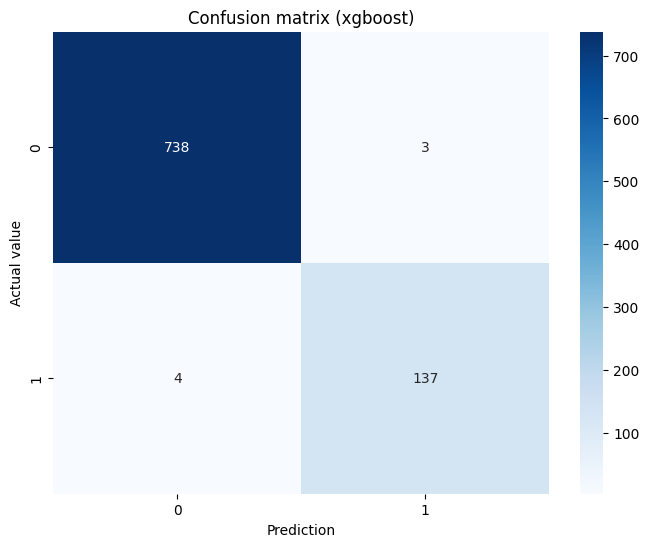

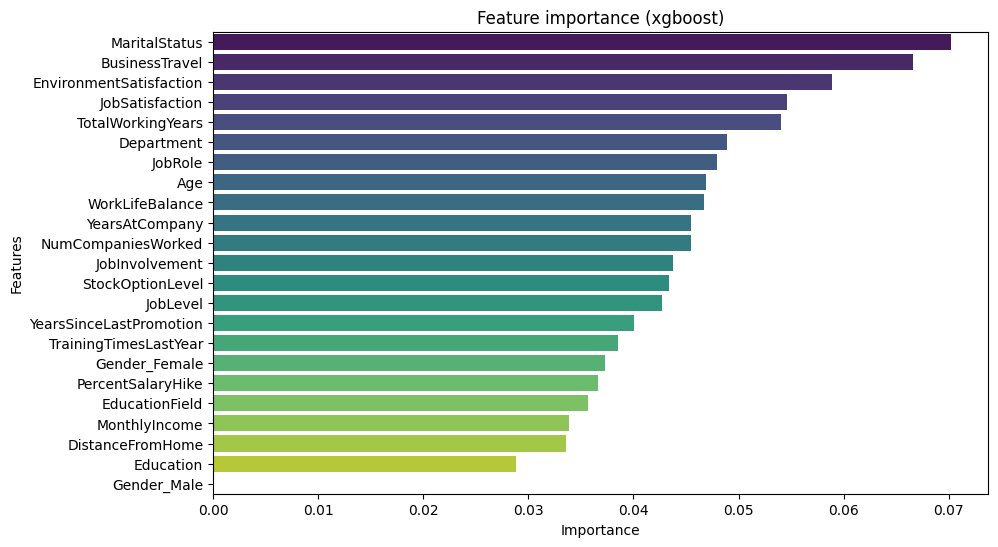

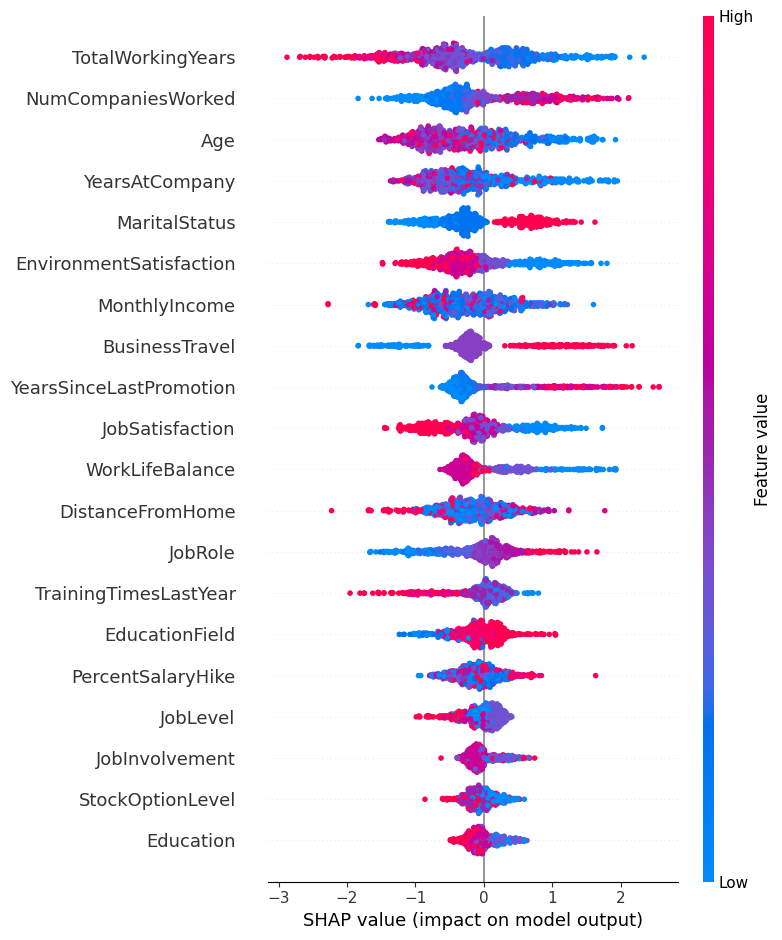

In [ ]:
model_list = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_results = pd.DataFrame()

for model in model_list:

    models.fit_model(model, file_name=model)
    models.plot_confusion_matrix(model)
    models.plot_predictors_importance(model)
    models.plot_shap_summary(model)
    df_current_results = models.get_metrics(model)
    df_current_results["model"] = model
    df_results = pd.concat([df_results, df_current_results], axis = 0)

In [34]:
df_results

,accuracy,precision,recall,f1,kappa,auc,time_seconds,cores,model
train,0.850340,0.825674,0.850340,0.808810,0.199208,0.798579,6.859216,NaN,xgboost
test,0.842404,0.803829,0.842404,0.802182,0.166918,0.735579,6.859216,NaN,xgboost
train,0.959184,0.958685,0.959184,0.957776,0.839331,0.966961,1.177123,11.0,xgboost
test,0.928571,0.925619,0.928571,0.925946,0.715283,0.910773,1.177123,11.0,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,194.923284,NaN,xgboost
test,0.993197,0.993252,0.993197,0.993137,0.974231,0.999569,194.923284,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,818.002439,11.0,xgboost
test,0.996599,0.996612,0.996599,0.996584,0.987227,0.999684,818.002439,11.0,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,137.175560,NaN,xgboost
test,0.992063,0.992045,0.992063,0.992052,0.970369,0.989979,137.175560,NaN,xgboost


In [35]:
df_results_colors = df_results.copy()
df_results_colors.reset_index(inplace = True, drop = True)
df_results_colors = df_results_colors.style.apply(rows_colors_model, axis=1)
df_results_colors

NameError: name 'rows_colors_model' is not defined